# Decision Trees

Classification and Regression Trees or **CART** is used to refer to **Decision Tree algorithms** that can be used for classification or regression predictive modeling problems. 

Decision Trees are based on **Hunt Algorithm.**

Typically there are infinite number of trees. Finding the optimal tree is an intracable problem. We can apply greedy approach to find local optimal trees.

- A **node** represents a single input variable *(X)* and a split point on that variable, assuming the variable is numeric. 
- The **leaf nodes** (also called terminal nodes) of the tree contain an output variable *(Y)* which is used to make a prediction.

---
**Contents**

1. Node Selection Algorithms
    - 1.1. Gini Gain
    - 1.2. Information Gain
    - 1.3. Chi-Squared Test
    - 1.4. Variance Reduction


2. Imports
2. Decision Trees by Hand
3. Decision Trees Using sckit-learn
---

# 1. Node Selection/Split Algorithms

 - 1. Gini Gain
 - 2. Information Gain
 - 3. Chi-Squared Test
 - 4. Reduction in Variance Test


# 2. Imports

In [169]:
import numpy as np
import pandas as pd
import tqdm
from io import StringIO
from sklearn.preprocessing import LabelEncoder
import collections
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
import category_encoders as CE

# tree viz
from sklearn import tree
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz
import pydotplus

import matplotlib.pyplot as plt  
import seaborn as sns

# 3. Decision Trees by Hand

A simple example calculated using hand.

In [170]:
# SAMPLE BY HAND CODED!

# results differ since features are encoded into numeric!
dummy = pd.DataFrame({"HomeOwner": ['Yes','No','No','Yes','No','No','Yes','No','No','No'],
                      "MartialStauts": ['Single','Married','Single','Married','Single','Married','Single','Single','Married','Single'],
                      "AnnualIncome": [125,100,70,120,95,60,220,85,75,90],
                      "Y": ['No','No','No','No','Yes','No','No','Yes','No','Yes']})
dummy

,HomeOwner,MartialStauts,AnnualIncome,Y
0,Yes,Single,125,No
1,No,Married,100,No
2,No,Single,70,No
3,Yes,Married,120,No
4,No,Single,95,Yes
5,No,Married,60,No
6,Yes,Single,220,No
7,No,Single,85,Yes
8,No,Married,75,No
9,No,Single,90,Yes


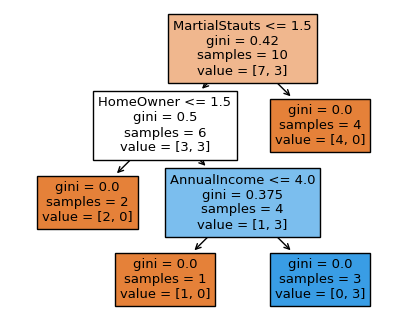

In [171]:
# columns
dum_col = ['HomeOwner','MartialStauts','AnnualIncome']

# feature encoding to numeric
ceenc = CE.OrdinalEncoder(cols=dum_col)
dummy[dum_col] = ceenc.fit_transform(dummy[dum_col])

# DT model
dum_mod = DecisionTreeClassifier(criterion='gini')
_ = dum_mod.fit(dummy[dum_col], dummy['Y'])

# Visualize DT
plt.figure(figsize=(5,4))
_ = tree.plot_tree(dum_mod, feature_names=dum_col, filled=True)

---

# 4. Decision Trees using scikit-learn

### 1. Load data

In [307]:
# Load dataset

data = pd.read_csv('../Data/processed_cuboulder_TwitterData.csv')
df = data
df.head(3)

,date,dateDay,dateMonth,dateMonthYear,dateYear,tweet,lang,retweetCount,likeCount,replyCount,...,user_followingCount,verifiedStatus,tweet_url,hastags,chr_count,topic,sum_LikeRetweet_Count,Processed_tweet,lang_mask,label
0,2020-01-01,1,1,2020-01,2020,"All campus dining locations are closed today, ...",en,0,0,0,...,201,False,https://twitter.com/CUBoulderLife/status/12123...,NaN,172,CUBoulder dining,0,campus dining location close today jan 1 happy...,en,cu_others
1,2020-01-02,2,1,2020-01,2020,"What are your campus dining options today, Jan...",en,0,1,0,...,201,False,https://twitter.com/CUBoulderLife/status/12127...,NaN,218,CUBoulder dining,1,what your campus dining option today jan 2 alf...,en,cu_others
2,2020-01-02,2,1,2020-01,2020,#FPGA Design for #Embedded #Systems\n\n#SoC #V...,en,1,5,0,...,4849,False,https://twitter.com/Skmarkelov/status/12128265...,"['FPGA', 'Embedded', 'Systems', 'SoC', 'Verilo...",302,CUBoulder online,6,fpga design embed system soc verilog vlsi asic...,en,cu_online


In [308]:
cols = ['retweetCount', 'likeCount', 'replyCount', 'user_followersCount', 'verifiedStatus', 'chr_count',
        'sum_LikeRetweet_Count']

cols_category = ['verifiedStatus']

col_label = 'label'

### 2. Setup

In [310]:
df[['retweetCount', 'likeCount', 'replyCount', 'user_followersCount', 'verifiedStatus', 'chr_count', 
   'sum_LikeRetweet_Count', 'label']]

,retweetCount,likeCount,replyCount,user_followersCount,verifiedStatus,chr_count,sum_LikeRetweet_Count,label
0,0,0,0,2524,False,172,0,cu_others
1,0,1,0,2524,False,218,1,cu_others
2,1,5,0,772,False,302,6,cu_online
3,1,1,0,2524,False,218,2,cu_others
4,0,10,0,228,False,275,10,cu_research
...,...,...,...,...,...,...,...,...
3389,4,19,1,287,False,291,23,cu_research
3390,0,3,0,2052,False,765,3,cu_research
3391,0,3,1,2052,False,757,3,cu_research
3392,3,11,3,15331,False,293,14,cu_research


In [311]:
# features
X = df[cols]

# label
Y = df[col_label]

In [312]:
X.head()

,retweetCount,likeCount,replyCount,user_followersCount,verifiedStatus,chr_count,sum_LikeRetweet_Count
0,0,0,0,2524,False,172,0
1,0,1,0,2524,False,218,1
2,1,5,0,772,False,302,6
3,1,1,0,2524,False,218,2
4,0,10,0,228,False,275,10


In [313]:
Y.head()

0      cu_others
1      cu_others
2      cu_online
3      cu_others
4    cu_research
Name: label, dtype: object

### 3. Split

In [314]:
# train-test split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 7)

### 4. Encoding

In [321]:
# Categorical Feature Encoding
import category_encoders as CE
Feature_Encoder = CE.OrdinalEncoder(cols=cols_category)
X_train[cols_category] = Feature_Encoder.fit_transform(X_train[cols_category])
X_test[cols_category] = Feature_Encoder.transform(X_test[cols_category])

# scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Label Encoding
# from sklearn.preprocessing import LabelEncoder
# Label_Encoder = LabelEncoder()
# Y_train = Label_Encoder.fit_transform(Y_train)
# Y_test = Label_Encoder.transform(Y_test)

### 5.A. Modelling: Model Using Gini Gain 

$ Gini.Gain = Gini.Impurity(parent) - Weighted.Gini.Impurity(Split)$

In [337]:
# instantiate the DecisionTreeClassifier model with criterion gini index
model_gini = DecisionTreeClassifier(criterion='gini',
                                    max_depth = 3,     # none - expanded unitll all leafs are pure (Y:1, N:0)
                                    min_samples_leaf=1,   # min samples required to be at a leaf node
                                    min_samples_split=2,  # min samples required to split an internal node
                                    random_state=7,
                                    ccp_alpha = 0.0       # pruning cost complexity
                                   )
model_gini.fit(X_train_scaled, Y_train)

DecisionTreeClassifier(max_depth=3, random_state=7)

### 5.B. Modelling: Model using Information Gain

$ Information.Gain = Entropy(parent) - Weighted.Entropy(Split)$

In [338]:
model_info = DecisionTreeClassifier(criterion="entropy",
                                    max_depth = 3,
                                    min_samples_leaf=1,
                                    min_samples_split=2,
                                    random_state=7)
model_info.fit(X_train_scaled, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=7)

### 6. Model Predictions

In [339]:
Y_hat_gini = model_gini.predict(X_test_scaled)
Y_hat_info = model_info.predict(X_test_scaled)

### 7. Display Output Data

In [340]:
test_data = X_test.copy()
test_data['Y'] = Y_test
test_data['Y_Hat_Gini'] = Y_hat_gini
test_data['Y_Hat_Info'] = Y_hat_info
test_data.iloc[:,-3:][:5]

,Y,Y_Hat_Gini,Y_Hat_Info
1075,cu_research,cu_research,cu_research
181,cu_research,cu_research,cu_research
445,cu_online,cu_online,cu_online
1657,cu_research,cu_research,cu_research
2321,cu_research,cu_research,cu_research


### 8. Metrics

In [341]:
def plot_metrics(Y_test, Y_pred, labels):
    """
        Function to output complete accuracy metrics for binary and multi-class classifiers!
        labels: list - list of unique labels str or numeric
    
    """
    print("--------------\n:: METRICS ::\n--------------\n")
    cm = confusion_matrix(Y_test, Y_pred, labels=labels)
    model_type = 'binary' if len(set(np.array(labels))) <=2 else "multi"
    if model_type == 'binary':
        """
                Binary Classification
        """
        TP = cm[1,1]
        FP = cm[0,1]
        FN = cm[1,0]
        TN = cm[0,0]
    else:
        """
                Multi-class Classification
        """
        FP = cm.sum(axis=0) - np.diag(cm)  
        FN = cm.sum(axis=1) - np.diag(cm)
        TP = np.diag(cm)
        TN = cm.sum() - (FP + FN + TP)

        # PRECISION: Positive predictive value
        PPV = TP/(TP+FP)
        # RECALL: Sensitivity, hit rate, or true positive rate
        TPR = TP/(TP+FN)
        # Specificity or true negative rate
        TNR = TN/(TN+FP) 
        # Negative predictive value
        NPV = TN/(TN+FN)
        # Fall out or false positive rate
        FPR = FP/(FP+TN)
        # False negative rate
        FNR = FN/(TP+FN)
        # False discovery rate
        FDR = FP/(TP+FP)
        # Overall accuracy
        ACC = (TP+TN)/(TP+FP+FN+TN)
        # Error Rate
        ER = (FP+FN)/(TP+FP+FN+TN)
        F1 = 2/(PPV**-1 + TPR**-1)
    
    # Confusion matrix PLOT
    fig, ax = plt.subplots(figsize=(4,2))
    sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap="Blues")
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = True, labeltop=True)
    plt.show()
    # DISPLAY
    if model_type == 'binary':
        print("\nTP:{}\tFP:{}\tFN:{}\tTN:{}"\
              .format(round(TP,2), round(FP,2), round(FN,2), round(TN,2)))
    else:
        for i in range(len(labels)):
            print("\n****** Label `{}` *******\nTP:{}\tFP:{}\tFN:{}\tTN:{}\t >> Precision:{}\tRecall:{}\tF1:{}"\
                  .format(labels[i], round(TP[i],2), round(FP[i],2), round(FN[i],2), round(TN[i],2), \
                          round(PPV[i],2), round(TPR[i],2), round(F1[i],2)))
    print("\nOVERALL:")
    print("Accuracy \t==== \t{} %\nPrecision \t==== \t{} %\nRecall Score\t==== \t{} %\nF1 SCORE \t==== \t{} %"\
          .format(round(accuracy_score(Y_test, Y_pred)*100,3),
                  round(precision_score(Y_test, Y_pred, average='weighted')*100,3),
                  round(recall_score(Y_test, Y_pred, average='weighted')*100,3),
                  round(f1_score(Y_test, Y_pred, average='weighted')*100,3) ))
    #print("Classification Report: ")
    #print(classification_report(Y_test, Y_pred))
    return

--------------
:: METRICS ::
--------------



/var/folders/p0/4xbhb9g13ydfpnpwd04tq0pm0000gn/T/ipykernel_23110/2214362957.py:28: RuntimeWarning: invalid value encountered in divide
  PPV = TP/(TP+FP)
/var/folders/p0/4xbhb9g13ydfpnpwd04tq0pm0000gn/T/ipykernel_23110/2214362957.py:40: RuntimeWarning: invalid value encountered in divide
  FDR = FP/(TP+FP)
/var/folders/p0/4xbhb9g13ydfpnpwd04tq0pm0000gn/T/ipykernel_23110/2214362957.py:45: RuntimeWarning: divide by zero encountered in reciprocal
  F1 = 2/(PPV**-1 + TPR**-1)


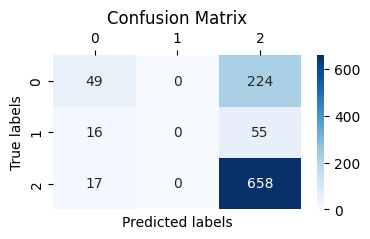


****** Label `cu_online` *******
TP:49	FP:33	FN:224	TN:713	 >> Precision:0.6	Recall:0.18	F1:0.28

****** Label `cu_others` *******
TP:0	FP:0	FN:71	TN:948	 >> Precision:nan	Recall:0.0	F1:nan

****** Label `cu_research` *******
TP:658	FP:279	FN:17	TN:65	 >> Precision:0.7	Recall:0.97	F1:0.82

OVERALL:
Accuracy 	==== 	69.382 %
Precision 	==== 	62.527 %
Recall Score	==== 	69.382 %
F1 SCORE 	==== 	61.474 %


/Users/pranjalpathak/opt/anaconda3/envs/Python_3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [342]:
# Gini Impurity Accuracy

plot_metrics(Y_test, Y_hat_gini, sorted(df.label.unique()))

--------------
:: METRICS ::
--------------



/var/folders/p0/4xbhb9g13ydfpnpwd04tq0pm0000gn/T/ipykernel_23110/2214362957.py:28: RuntimeWarning: invalid value encountered in divide
  PPV = TP/(TP+FP)
/var/folders/p0/4xbhb9g13ydfpnpwd04tq0pm0000gn/T/ipykernel_23110/2214362957.py:40: RuntimeWarning: invalid value encountered in divide
  FDR = FP/(TP+FP)
/var/folders/p0/4xbhb9g13ydfpnpwd04tq0pm0000gn/T/ipykernel_23110/2214362957.py:45: RuntimeWarning: divide by zero encountered in reciprocal
  F1 = 2/(PPV**-1 + TPR**-1)


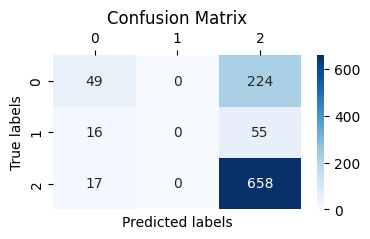


****** Label `cu_online` *******
TP:49	FP:33	FN:224	TN:713	 >> Precision:0.6	Recall:0.18	F1:0.28

****** Label `cu_others` *******
TP:0	FP:0	FN:71	TN:948	 >> Precision:nan	Recall:0.0	F1:nan

****** Label `cu_research` *******
TP:658	FP:279	FN:17	TN:65	 >> Precision:0.7	Recall:0.97	F1:0.82

OVERALL:
Accuracy 	==== 	69.382 %
Precision 	==== 	62.527 %
Recall Score	==== 	69.382 %
F1 SCORE 	==== 	61.474 %


/Users/pranjalpathak/opt/anaconda3/envs/Python_3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [343]:
# Info Gain Accuracy

plot_metrics(Y_test, Y_hat_info, sorted(df.label.unique()))

In [344]:
# Checking for overfitting and underfitting

print('GINI:\nTraining set score: {:.4f}'.format(model_gini.score(X_train, Y_train)))
print('Test set score: {:.4f}'.format(model_gini.score(X_test, Y_test)))

print('\nINFO:\nTraining set score: {:.4f}'.format(model_info.score(X_train, Y_train)))
print('Test set score: {:.4f}'.format(model_info.score(X_test, Y_test)))

GINI:
Training set score: 0.6829
Test set score: 0.6624

INFO:
Training set score: 0.6829
Test set score: 0.6624


/Users/pranjalpathak/opt/anaconda3/envs/Python_3.8/lib/python3.8/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/Users/pranjalpathak/opt/anaconda3/envs/Python_3.8/lib/python3.8/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/Users/pranjalpathak/opt/anaconda3/envs/Python_3.8/lib/python3.8/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/Users/pranjalpathak/opt/anaconda3/envs/Python_3.8/lib/python3.8/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


### 9. Visualize decision-trees

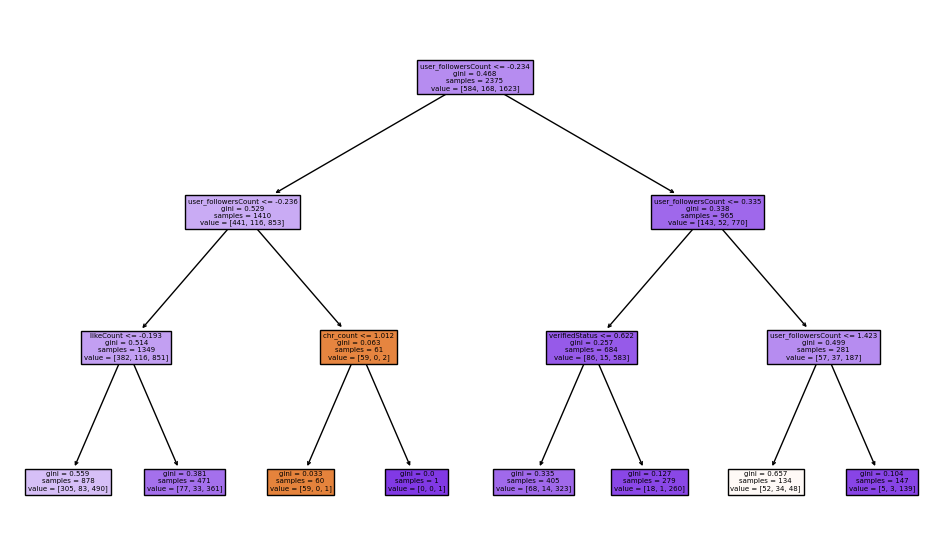

In [345]:
# TREE SPLIT USING -- GINI GAIN --

plt.figure(figsize=(12,7))
_ = tree.plot_tree(model_gini, feature_names=X_train.columns, filled=True)

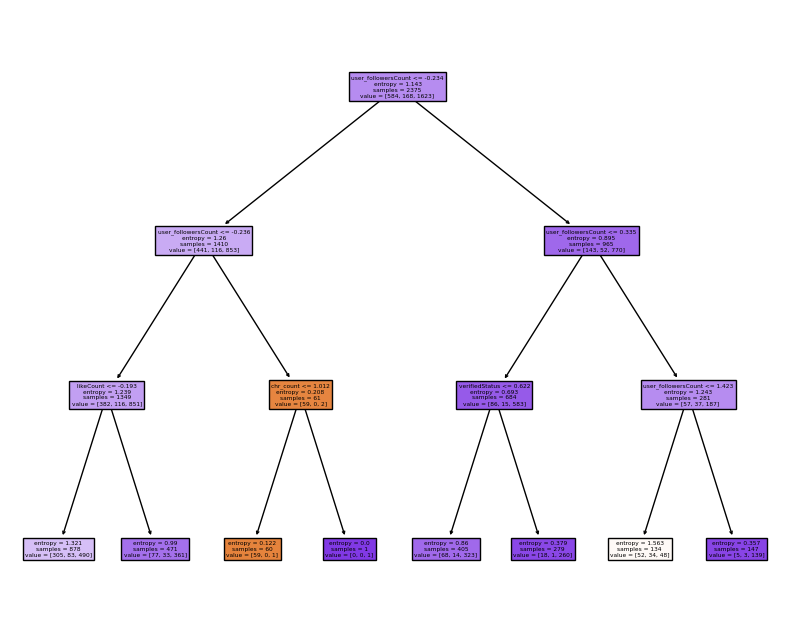

In [346]:
# TREE SPLIT USING -- INFO GAIN --

plt.figure(figsize=(10,8))
_ = tree.plot_tree(model_info, feature_names=X_train.columns, filled=True)

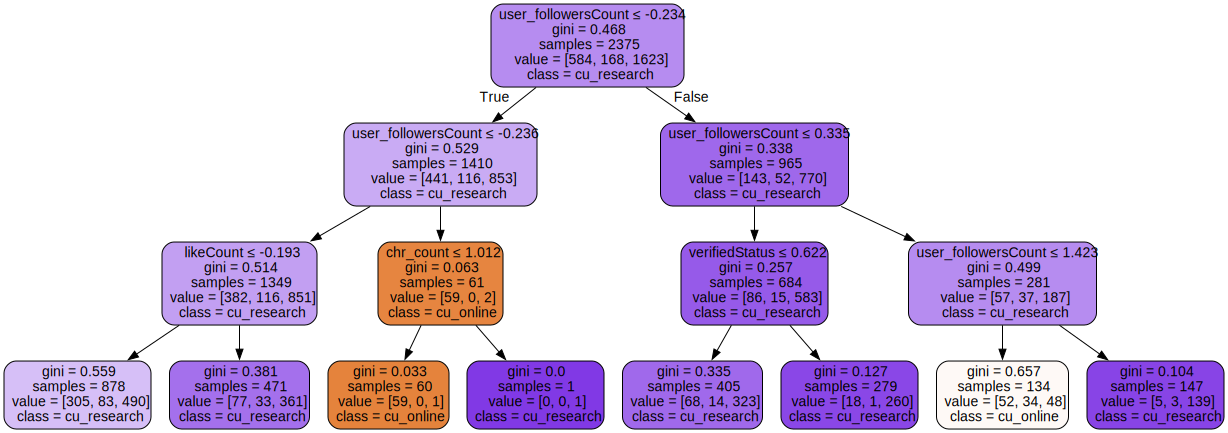

In [347]:
# another method to plot

TREE_data = tree.export_graphviz(model_gini, out_file=None, feature_names=X_train.columns,
                                 class_names = sorted(df.label.unique()), filled=True, 
                                 rounded=True, special_characters=True)
graph = graphviz.Source(TREE_data) 
# save to pdf
graph.render("../output/Tree_Record") 
graph

### 10. Feature Importance

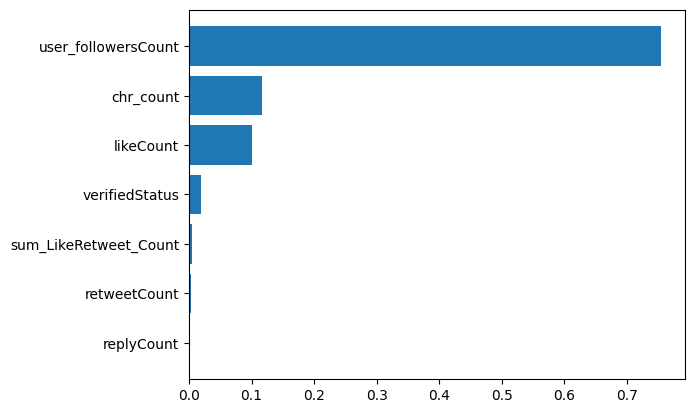

In [298]:
# get importance
importances = model_gini.feature_importances_
indices = np.argsort(importances)

fig, ax = plt.subplots()
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(X_train.columns)[indices])

### 11. Pruning

To control a tree, you may:-

- Hyperparam tuning (like controlling depth, etc)
- Inc/dec number of samples
- Add/drop features

#### Cost Effectective Pruning by controlling `max_depth`

100%|███████████████████████████████████████████| 29/29 [00:00<00:00, 31.74it/s]


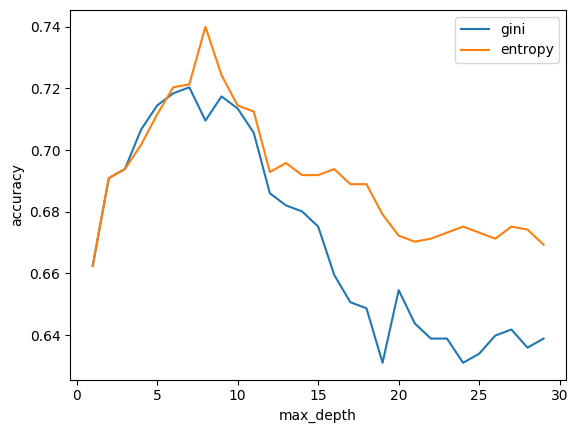

In [299]:
max_depth = []
acc_gini = []
acc_entropy = []

for i in tqdm.tqdm(range(1,30)):
    ####
    dtree = DecisionTreeClassifier(criterion='gini', max_depth=i)
    dtree.fit(X_train, Y_train)
    pred = dtree.predict(X_test)
    # not a good measure, but our class is balanced!
    acc_gini.append(accuracy_score(Y_test, pred))
    ####
    dtree = DecisionTreeClassifier(criterion='entropy', max_depth=i)
    dtree.fit(X_train, Y_train)
    pred = dtree.predict(X_test)
    acc_entropy.append(accuracy_score(Y_test, pred))
    ####
    max_depth.append(i)


d = pd.DataFrame({"acc_gini": pd.Series(acc_gini), "acc_entropy": pd.Series(acc_entropy),
                  "max_depth": pd.Series(max_depth)})

# visualizing changes in parameters
plt.plot("max_depth", "acc_gini", data=d, label="gini")
plt.plot("max_depth", "acc_entropy", data=d, label="entropy")
plt.xlabel("max_depth")
plt.ylabel("accuracy")
plt.legend()

It seems like in this scenario:
- gini works best for longer trees,
- entropy does a better job for shorter trees

Also, the accuracy flattens out at depth = 8 for entropy based gain, after which the model is really over-fitting!

***--> best model:***
    
            DecisionTreeClassifier(criterion='entropy', max_depth=8)

----

X - X